# DATA EXPLORATION
**Context:** Air Quality Forecasting (Time Series Regression)

Data exploration is the first step in the journey of extracting insights from raw datasets. Data exploration serves as the compass that guides we through the vast sea of information. It involves getting to know the data intimately, understanding its structure, and uncovering valuable nuggets that lay hidden beneath the surface.

Data exploration doesn’t stop after the initial stage before feature engineering; it should be performed throughout the entire system development process. After feature construction, we also need to redo EDA to verify whether the processed data is truly clean. Moreover, after building and analyzing the model, it is common to return to EDA to continue uncovering hidden insights within the dataset. The deeper my understanding of the data, the sooner we can explain model behaviors and make appropriate adjustments.

## I. Data Understanding about Raw Dataset
**Familiarization:** Get an overview of the data format, size, and source.

**Variable Identification:** Understand the meaning and purpose of each variable in the dataset.

### 1. Import Libraries and Load Dataset
At the beginning, we need import all necessary libraries as well as load the raw data in folder `data/raw` by `pandas`

#### 1.1 Import Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

#### 1.2 Load Dataset

In [3]:
path = "../data/raw/vietnam_air_quality.csv"
try:
    df = pd.read_csv(path)
    print("[SUCCESS]: Loading dataset successful")
except Exception as e:
    print(f"[ERROR]: Loading dataset fail: {e}")

[SUCCESS]: Loading dataset successful


### 2. Basic Information
In this section, we will focus explore the **overall size of dataset** as well as **meaning of each row represent**


#### 2.1 Overview of Data Structure

In [4]:
df.head()

,timestamp,city,lat,lon,aqi,pollution_level,pollution_class,temp,humidity,rain,wind_speed,wind_dir,pressure,cloud,pm2_5,pm10,co,no2,o3,so2
0,2023-01-01T00:00,Biên Hòa,10.914111,106.891717,133,Unhealthy for Sensitive,2,23.0,64,0.0,10.3,12,1010.3,100,65.0,95.0,993.0,84.4,25.0,37.5
1,2023-01-01T00:00,Buôn Ma Thuột,12.661262,108.031021,53,Moderate,1,17.7,88,0.3,7.7,101,968.4,100,13.6,23.2,485.0,1.8,105.0,2.2
2,2023-01-01T00:00,Bắc Ninh,21.175170,106.059398,146,Unhealthy for Sensitive,2,11.1,75,0.0,6.2,353,1023.5,0,52.4,74.7,678.0,8.8,58.0,15.4
3,2023-01-01T00:00,Cao Bằng,22.650998,106.259068,82,Moderate,1,10.8,83,0.0,4.6,162,996.6,100,31.9,45.5,528.0,6.4,45.0,7.6
4,2023-01-01T00:00,Cao Lãnh,10.460179,105.612291,86,Moderate,1,24.4,55,0.0,12.0,7,1013.9,100,21.8,32.2,693.0,23.0,47.0,3.3


In [5]:
df.tail()

,timestamp,city,lat,lon,aqi,pollution_level,pollution_class,temp,humidity,rain,wind_speed,wind_dir,pressure,cloud,pm2_5,pm10,co,no2,o3,so2
864989,2025-11-26T00:00,Vĩnh Long,10.252694,105.941002,75,Moderate,1,24.4,72,0.0,11.3,13,1009.0,99,20.4,20.8,391.0,12.4,71.0,14.8
864990,2025-11-26T00:00,Điện Biên Phủ,21.490438,103.104635,53,Moderate,1,9.9,73,0.0,3.6,84,915.1,0,17.1,18.0,227.0,16.6,51.0,9.0
864991,2025-11-26T00:00,Đà Lạt,11.908263,108.457209,53,Moderate,1,15.9,80,0.0,24.0,27,877.4,98,14.4,15.4,214.0,1.7,112.0,1.5
864992,2025-11-26T00:00,Đà Nẵng,16.068000,108.212000,100,Moderate,1,21.0,89,0.2,4.9,360,1015.2,100,16.9,21.7,554.0,1.0,116.0,3.8
864993,2025-11-26T00:00,Đông Hà,16.802493,107.095338,79,Moderate,1,21.2,76,0.0,9.6,6,1014.4,100,30.9,37.1,269.0,5.0,106.0,8.1


#### 2.2 Overview about Size of Dataset

In [6]:
# Display the shape of the dataset
print(f"Data shape: {df.shape}")

num_rows, num_columns = df.shape
# Display rows of the dataset
print(f"Amount of rows is: {num_rows}")

# Display columns of the dataset
print(f"Amount of columns is: {num_columns}")


Data shape: (864994, 20)
Amount of rows is: 864994
Amount of columns is: 20


**In summary:** 
- With size `864994x20` it proved this is a rich dataset, large enough to run accurate predictive models and wide enough for in-depth analysis of the relationship between weather and environmental pollution. 

- Each row represents air quality and weather data for a specific city at a given point in time from **January 1, 2023** to **November 26, 2025**.

### 3. Column Inventory


#### 3.1 Columns of the Dataset

In [7]:
# Display the columns of the dataset
print(f"The dataset columns are: {', '.join(df.columns)}")

The dataset columns are: timestamp, city, lat, lon, aqi, pollution_level, pollution_class, temp, humidity, rain, wind_speed, wind_dir, pressure, cloud, pm2_5, pm10, co, no2, o3, so2


#### 3.2 Meaning and Definition of each Column

- **Time and Position**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**timestamp**|Datetime|The specific date and time observation (e.g., `2023-01-01T08:00`).|
|**city**|String|The name of the province or city (e.g., `Ha Noi`, `Ho Chi Minh City`).|
|**lat**|Degree|Latitude coordinate of the location.|
|**lon**|Degree|Longitude coordinate of the location.|

- **Pollution Index**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**aqi**|Index|**Air Quanlity Index (US EPA Standard)**. The target variable representing the overall air quanlity status.|
|**pollution_level**|String|Categorical description of the AQI (e.g., `Good`, `Moderate`, `Unhealthy`).|
|**pollution_class**|Integer|Numerical class label for the AQI (0 to 5).|

- **Weather Factor**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**temp**|°C|Ambient temperature measured at 2 meters above ground.|
|**humidity**|%|Relative humidity measured at 2 meters above ground.|
|**rain**|mm|Total precipitation (rain, showers, snow) in the preceding hour.|
|**wind_speed**|km/h|Wind speed measured at 10 meters above ground.|
|**wind_dir**|Degree|Wind direction measured at 10 meters (0° = North, 90° = East).|
|**pressure**|hPa|Atmospheric pressure at the surface level.|
|**cloud**|%|Total cloud cover percentage (0% = clear sky, 100% = overcast).|

- **Pollution Concentration**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**pm2_5**|$\mu g/m^{3}$|Concentration of Particulate Matter < 2.5 micrometers (Fine dust). The main driver of AQI.|
|**pm10**|$\mu g/m^{3}$|Concentration of Particulate Matter < 10 micrometers (Coarse dust).|
|**co**|$\mu g/m^{3}$|Concentration of Carbon Monoxide.|
|**no2**|$\mu g/m^{3}$|Concentration of Nitrogen Dioxide.|
|**o3**|$\mu g/m^{3}$|Concentration of Ozone.|
|**so2**|$\mu g/m^{3}$|Concentration of Sulphur Dioxide.|

Data Types

In [8]:
# Display data types of each column
df.dtypes

timestamp           object
city                object
lat                float64
lon                float64
aqi                  int64
pollution_level     object
pollution_class      int64
temp               float64
humidity             int64
rain               float64
wind_speed         float64
wind_dir             int64
pressure           float64
cloud                int64
pm2_5              float64
pm10               float64
co                 float64
no2                float64
o3                 float64
so2                float64
dtype: object

**In summary**:
- Most columns are very important:
    - **Pollutants (pm2_5, pm10, no2,...)**: These are the direct causes of the AQI index. Analyzing them helps to understand the sources of pollution.
    - **Meteorological factors (temp, wind, rain...)**: These are crucial for correlation analysis. For example, strong winds can dilute dust (decreasing AQI), while high humidity can trap dust (increasing AQI).
    - **Time & Location (timestamp, city)**: These are necessary for trend analysis over time and geographic comparison (geospatial analysis).

- Columns `lat` and `lon` should be dropped because when they serve as proxies for the location, which is now explicitly represented by the `city` column derived from the API mapping process

- Through step **Data Collection** from API, most of columns have **right datatype already**

-  The `timestamp` column is currently of type `object` and should be converted to `datetime` for proper time series analysis and it will execute in step **Data Preprocessing**

### 4. Duplicated Row

In [9]:
duplicated_rows = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_rows}")

Number of duplicated rows: 0


**In summary**: The result of `df.duplicated().sum()` being `0` is a **good sign**, and the reason is very simple:

- The collabroration of columns about **time and position** inclued in: `timestamp`, `city`, `lat`, `lon` which creates a unique identifier for each row

- **Logic**: Data for a given point in day (for example: **2023-01-01T00:00**) and a given city (for example: **Hà Nội**) can only have one unique set of air quality indices.

### 5. Missing Data

#### 5.1 Explicit Missing Data Check (Column-wise)
**Objective**: To detect technically missing values (e.g., NaN, Null, None) recognized by the system. This step scans all columns to ensure that every existing row contains populated fields.

In [10]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"'{col}': {missing_percentage:.2f}%")

'timestamp': 0.00%
'city': 0.00%
'lat': 0.00%
'lon': 0.00%
'aqi': 0.00%
'pollution_level': 0.00%
'pollution_class': 0.00%
'temp': 0.00%
'humidity': 0.00%
'rain': 0.00%
'wind_speed': 0.00%
'wind_dir': 0.00%
'pressure': 0.00%
'cloud': 0.00%
'pm2_5': 0.00%
'pm10': 0.00%
'co': 0.00%
'no2': 0.00%
'o3': 0.00%
'so2': 0.00%


#### 5.2 Implicit Missing Data & Data Validity Check
**Objective**: To detect **data masquerading as valid**. These are values that exist technically but represent missing information or physical impossibilities (garbage data).

We examine two categories:

1. **Categorical Anomalies**: Empty strings `""`, `whitespace`, or placeholders like `Unknown`, `N/A`.

2. **Physical Validity**: Numerical values that violate physical laws (e.g., Pressure = 0 or negative AQI...).

In [11]:
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    empty_mask = df[col].astype(str).str.strip() == '' # Check empty string hoặc or whitespace
    # Check keyword
    garbage_mask = df[col].astype(str).str.lower().isin(['nan', 'null', 'unknown', 'n/a', '?'])
    
    count_invalid = (empty_mask | garbage_mask).sum()
    if count_invalid > 0:
        print(f"Column '{col}': Contains {count_invalid} invalid entries (empty/unknown).")

numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if col in ['humidity', 'cloud']: # Must be in range 0-100
        out_of_range = ((df[col] < 0) | (df[col] > 100)).sum()
        if out_of_range > 0:
            print(f"Column {col}: Found {out_of_range} rows out of range [0, 100].")

    if col in ['pressure', 'lat', 'lon']: # Check zero number in columns dont should have zero number
        zeros = (df[col] == 0).sum()
        if zeros > 0: 
            print(f"Column {col}: Contains {zeros} zeros (physically unlikely).")
    
    # Check negative number
    if col in ['rain', 'wind_speed', 'pressure', 'aqi', 
                'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2']: 
        negatives = (df[col] < 0).sum()
        if negatives > 0: 
            print(f"Column '{col}': Contains {negatives} negative values.")

# PM2.5 is subset of PM10
if 'pm2_5' in df.columns and 'pm10' in df.columns:
    pm_logic_error = len(df[df['pm2_5'] > df['pm10']])
    print(f"PM Logic: Found {pm_logic_error} rows where PM2.5 > PM10 (Physically impossible).")
    
print("Implicit check completed.")

PM Logic: Found 93 rows where PM2.5 > PM10 (Physically impossible).
Implicit check completed.


#### 5.3 Structural Checking
**Objective:** Identify records (rows) that are completely missing at specific time points. In **Iime-series data**, a perfect dataset is continuous.

**Method:** Compare the **actual dataset** with the **Cartesian Product (All Hours × All Cities)**.

In [12]:
cities = df['city'].unique()

# Parse temp timestamp
temp_ts = pd.to_datetime(df['timestamp']) 
start_date = temp_ts.min()
end_date = temp_ts.max()

# Create time frame (reference)
all_hours = pd.date_range(
    start=start_date, 
    end=end_date, 
    freq='h'
)

# Create Cartesian Product table from Day x Hour x City
expected_index = pd.MultiIndex.from_product(
    [all_hours, cities],
    names=['timestamp', 'city']
)

expected_rows = len(expected_index)
missing_rows = expected_rows - num_rows

print(f"--- RANGE OF CHECKING ---")
print(f"From: {start_date} to: {end_date}")
print(f"Number of city: {len(cities)}")
print(f"Number of expected row: {len(expected_index):,}")
print(f"Number of actually row: {num_rows:,}")
print(f"Number of missing rows is: {missing_rows:,}")


--- RANGE OF CHECKING ---
From: 2023-01-01 00:00:00 to: 2025-11-26 00:00:00
Number of city: 34
Number of expected row: 864,994
Number of actually row: 864,994
Number of missing rows is: 0


**In summary**: From output with **two method checking**, we can conclude that our dataset don't have **missing completely** and **missing values** ....

## II. Data Understanding about Processed Data

### 1. Load Processed Data

In [13]:
path = "../data/processed/processed_data.csv"
try:
    df_processed = pd.read_csv(path, parse_dates=['timestamp'])
    print("[SUCCESS]: Loading dataset successful")
except Exception as e:
    print(f"[ERROR]: Loading dataset fail: {e}")

[SUCCESS]: Loading dataset successful


### 2. Basic Information
Similarity to **Data Understanding about Raw Dataset** we need explore about the size as well as the structure about the dataset after preprocessing

#### 2.1 Overview of Data Structure

In [14]:
df_processed.head()

,timestamp,city,aqi,pollution_level,pollution_class,temp,humidity,rain,wind_speed,wind_dir,pressure,cloud,pm2_5,pm10,co,no2,o3,so2
0,2023-01-01,Biên Hòa,133,Unhealthy for Sensitive,2,23.0,64,0.0,10.3,12,1010.3,100,65.0,95.0,993.0,84.4,25.0,37.5
1,2023-01-01,Buôn Ma Thuột,53,Moderate,1,17.7,88,0.3,7.7,101,968.4,100,13.6,23.2,485.0,1.8,105.0,2.2
2,2023-01-01,Bắc Ninh,146,Unhealthy for Sensitive,2,11.1,75,0.0,6.2,353,1023.5,0,52.4,74.7,678.0,8.8,58.0,15.4
3,2023-01-01,Cao Bằng,82,Moderate,1,10.8,83,0.0,4.6,162,996.6,100,31.9,45.5,528.0,6.4,45.0,7.6
4,2023-01-01,Cao Lãnh,86,Moderate,1,24.4,55,0.0,12.0,7,1013.9,100,21.8,32.2,693.0,23.0,47.0,3.3


#### 2.2 Overview about Size of Dataset

In [15]:
# Display the shape of the dataset
print(f"Data shape: {df_processed.shape}")

num_rows, num_columns = df_processed.shape
# Display rows of the dataset
print(f"Amount of rows is: {num_rows}")

# Display columns of the dataset
print(f"Amount of columns is: {num_columns}")


Data shape: (864994, 18)
Amount of rows is: 864994
Amount of columns is: 18


**In summary:**
- After removing the two location-related features (latitude and longitude), the number of remaining features is reduced to 18, compared to 20 columns in the original raw dataset.

### 3. Column Inventory

#### 3.1 Column of the Dataset

In [16]:
# Display the columns of the dataset
print(f"The dataset columns are: {', '.join(df_processed.columns)}")

The dataset columns are: timestamp, city, aqi, pollution_level, pollution_class, temp, humidity, rain, wind_speed, wind_dir, pressure, cloud, pm2_5, pm10, co, no2, o3, so2


#### 3.2 Data Type

In [17]:
# Display data types of each column
df_processed.dtypes

timestamp          datetime64[ns]
city                       object
aqi                         int64
pollution_level            object
pollution_class             int64
temp                      float64
humidity                    int64
rain                      float64
wind_speed                float64
wind_dir                    int64
pressure                  float64
cloud                       int64
pm2_5                     float64
pm10                      float64
co                        float64
no2                       float64
o3                        float64
so2                       float64
dtype: object

**In summary:** The current data types are appropriately assigned and consistent with the semantic meaning of each column in the processed dataset.

## III. Columns Analysis 


### 1. Numerical Columns Analysis

#### 1.1 Numerical Columns in Dataset

In [18]:
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
print(f"There are {len(numeric_cols)} numeric columns.")
print(numeric_cols)

There are 15 numeric columns.
['aqi', 'pollution_class', 'temp', 'humidity', 'rain', 'wind_speed', 'wind_dir', 'pressure', 'cloud', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2']


#### 1.2 Value Distribution

In [19]:
df_processed2 = df_processed[numeric_cols].copy()
df_processed2.describe().T

,count,mean,std,min,25%,50%,75%,max
aqi,864994.0,77.597932,37.503329,9.0,52.0,68.0,96.0,346.0
pollution_class,864994.0,1.069669,0.830173,0.0,1.0,1.0,1.0,5.0
temp,864994.0,24.836440,4.975442,2.9,22.0,25.3,28.1,41.6
humidity,864994.0,79.858127,14.887011,12.0,71.0,83.0,92.0,100.0
rain,864994.0,0.264235,1.061333,0.0,0.0,0.0,0.1,49.1
wind_speed,864994.0,8.744939,5.427078,0.0,4.6,7.6,11.9,128.3
wind_dir,864994.0,162.703037,97.954400,0.0,84.0,150.0,238.0,360.0
pressure,864994.0,990.092590,35.186982,870.4,985.5,1005.5,1010.1,1033.7
cloud,864994.0,74.457233,35.881370,0.0,48.0,99.0,100.0,100.0
pm2_5,864994.0,24.863653,20.565061,0.0,11.6,19.1,31.7,737.6


**In summary:**
1. `aqi`:
- The average AQI value is approximately **77.60**, indicating generally **moderate air pollution levels**.
- AQI values range from **9** to **346**, reflecting substantial variation in air quality conditions.
- 50% of observations have AQI values between **52** and **96** (from the 25th to 75th percentile).
- The standard deviation is **~37.50**, suggesting high variability driven by pollution spikes.

2. `pollution_class`:
- The average pollution class is approximately **1.07**, indicating that most observations fall into lower pollution categories.
- Values range from **0** to **5**, covering all defined pollution severity levels.
- 50% of observations fall between **1** and **1**, showing strong concentration around a single class.
- The standard deviation is **~0.83**, suggesting limited dispersion.

3. `temp`:
- The average temperature is approximately **24.84°C**, consistent with a tropical climate.
- Temperature values range from **2.9°C** to **41.6°C**, indicating occasional extreme conditions.
- 50% of observations fall between **22.0°C** and **28.1°C**.
- The standard deviation is **~4.98**, suggesting moderate variability.

4. `humidity`:
- The average humidity level is approximately **79.86%**, indicating generally moist atmospheric conditions.
- Humidity values range from **12%** to **100%**.
- 50% of observations fall between **71%** and **92%**.
- The standard deviation is **~14.89**, showing moderate dispersion.

5. `rain`:
- The average rainfall is approximately **0.26 mm**, indicating that most periods experience little or no rain.
- Rainfall values range from **0** to **49.1 mm**, reflecting occasional heavy precipitation.
- 50% of observations fall between **0** and **0.1 mm**.
- The standard deviation is **~1.06**, indicating a highly right-skewed distribution.

6. `wind_speed`:
- The average wind speed is approximately **8.74 m/s**.
- Wind speed values range from **0** to **128.3 m/s**, indicating the presence of extreme outliers.
- 50% of observations fall between **4.6** and **11.9 m/s**.
- The standard deviation is **~5.42**, suggesting moderate to high variability.


7. `wind_dir`:
- The average wind direction is approximately **162.7°**, representing a broad directional distribution.
- Wind direction values range from **0°** to **360°**, covering all possible directions.
- 50% of observations fall between **84°** and **238°**.
- The standard deviation is **~97.95**, indicating wide dispersion.

8. `pressure`:
- The average atmospheric pressure is approximately **990.09 hPa**, indicating relatively stable conditions.
- Pressure values range from **870.4 hPa** to **1033.7 hPa**.
- 50% of observations fall between **985.5 hPa** and **1010.1 hPa**.
- The standard deviation is **~35.19**, suggesting limited variability.

9. `cloud`:
- The average cloud cover is approximately **74.46%**, indicating generally cloudy conditions.
- Cloud values range from **0%** to **100%**.
- 50% of observations fall between **48%** and **100%**.
- The standard deviation is **~35.88**, reflecting high variability.


10. `pm2_5`:
- The average PM2.5 concentration is approximately **24.86 µg/m³**.
- Values range from **0** to **737.6 µg/m³**, indicating extreme pollution events.
- 50% of observations fall between **11.6** and **31.7 µg/m³**.
- The standard deviation is **~20.57**, suggesting high dispersion.

11. `pm10`:
- The average PM10 concentration is approximately **32.58 µg/m³**.
- Values range from **0** to **1061.7 µg/m³**.
- 50% of observations fall between **16.1** and **41.7 µg/m³**.
- The standard deviation is **~25.42**, indicating substantial variability.

12. `co`:
- The average CO concentration is approximately **386.80**.
- CO values range from **71** to **5784**, showing extreme right-skewness.
- 50% of observations fall between **230** and **470**.
- The standard deviation is **~246.05**, indicating high variability.

13. `no2`:
- The average NO₂ concentration is approximately **11.62**.
- Values range from **0** to **162.5**.
- 50% of observations fall between **3.2** and **15.0**.
- The standard deviation is **~13.03**, showing significant dispersion.

14. `o3`:
- The average O₃ concentration is approximately **72.96**.
- Values range from **0** to **479**.
- 50% of observations fall between **44** and **95**.
- The standard deviation is **~40.47**, indicating high variability.

15. `so2`:
- The average SO₂ concentration is approximately **11.53**.
- Values range from **0** to **236.5**.
- 50% of observations fall between **3.0** and **16.5**.
- The standard deviation is **~12.01**, suggesting notable dispersion.


#### 1.3 Visualization Distribution

In [20]:
palette = sns.color_palette("Set2", len(numeric_cols))
sns.set_style("whitegrid")

def plot_numerical_distribution_and_boxplot(col, i):
    color = palette[i]
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(
        data=df_processed,
        x=col,
        kde=True,
        bins=40,
        ax=axes[0],
        color=color,
        edgecolor="white"
    )
    axes[0].set_title(f'Distribution of {col}', fontsize=13, weight='bold')
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(
        data=df_processed,
        x=col,
        ax=axes[1],
        color=color,
        width=0.4
    )
    axes[1].set_title(f'Box Plot of {col}', fontsize=13, weight='bold')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

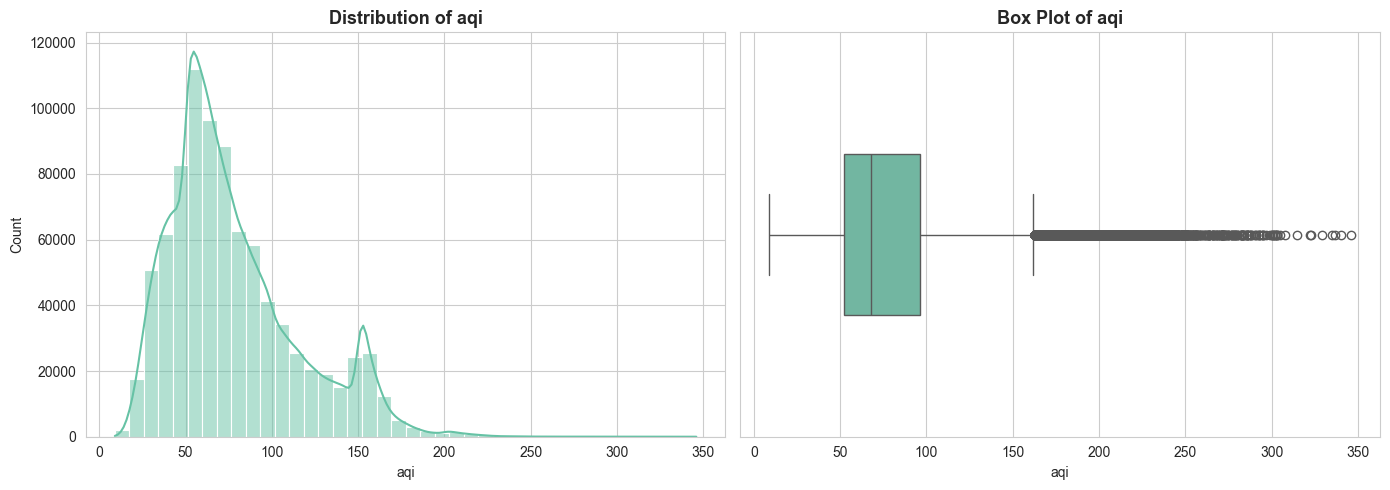

In [21]:
plot_numerical_distribution_and_boxplot(numeric_cols[0], 0)

**In summary:**
- The distribution of `aqi` is **right-skewed**, with most values concentrated between **50 and 100**, indicating that air quality is generally at a **moderate level** across the majority of observations.
- The box plot reveals a substantial number of **high-value outliers** (above **150**), representing periods of **severe air pollution events**.
- Although these extreme AQI values are relatively infrequent, they contribute significantly to overall variability and emphasize the importance of monitoring pollution spikes rather than relying solely on average conditions.

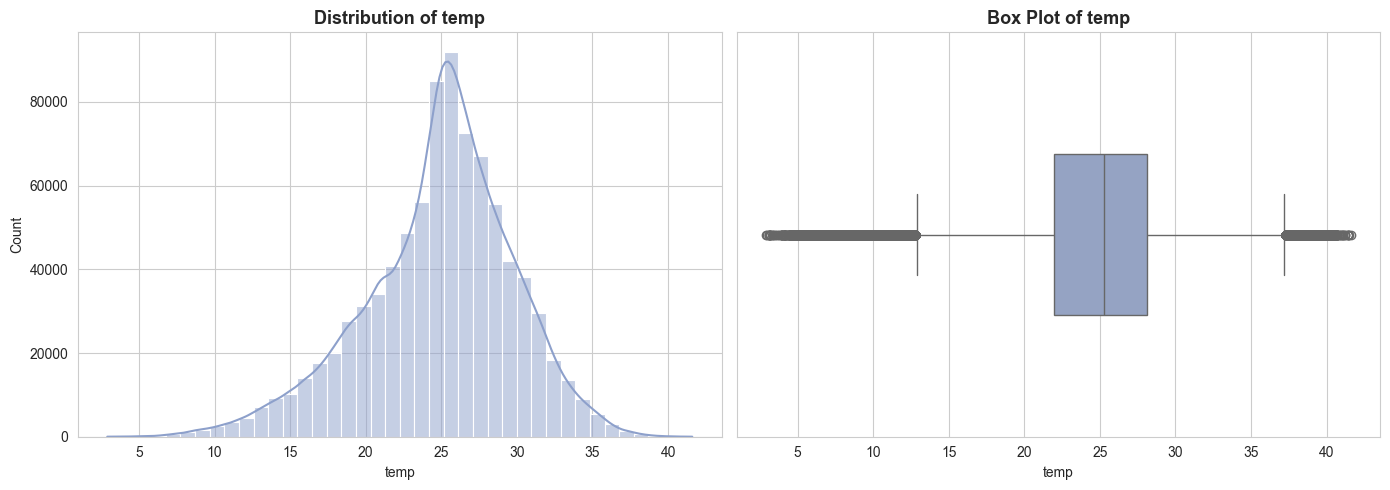

In [22]:
plot_numerical_distribution_and_boxplot(numeric_cols[2], 2)

**In summary:**
- The distribution of `temp` is approximately **bell-shaped and close to normal**, with most values concentrated between **20°C and 30°C**, indicating relatively stable temperature conditions.
- The box plot shows the presence of several **low and high temperature outliers** (below **10°C** and above **35°C**), representing occasional extreme weather conditions.
- These outliers are relatively infrequent and do not significantly distort the central distribution, but they highlight periods of unusual temperature that may influence environmental and air quality dynamics.

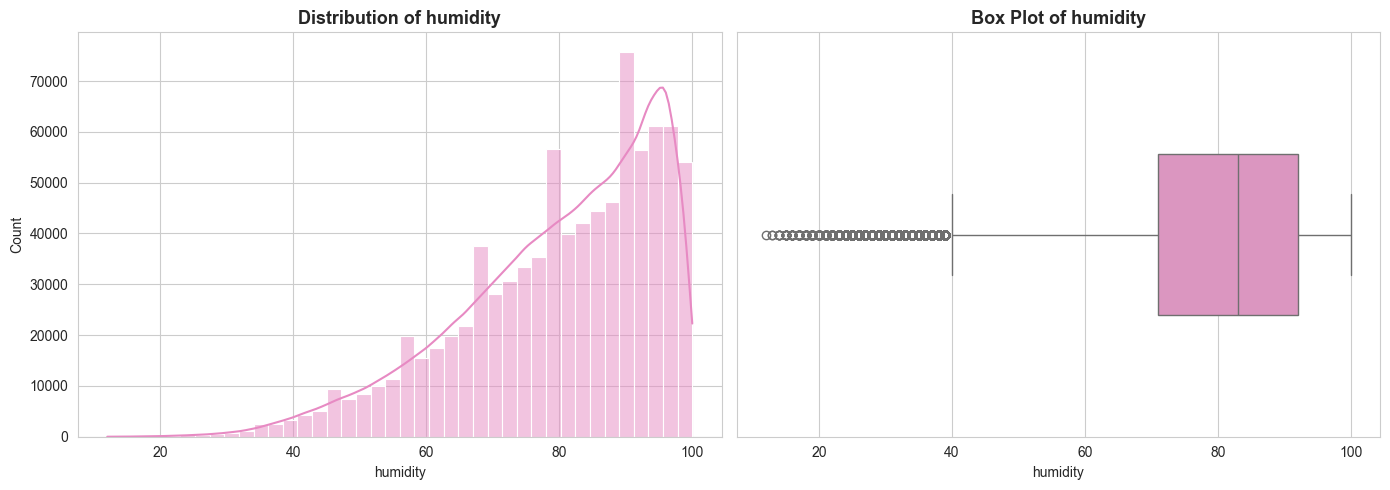

In [23]:
plot_numerical_distribution_and_boxplot(numeric_cols[3], 3)

**In summary:**
- The distribution of `humidity` is **left-skewed**, with most values concentrated at **high humidity levels (70–100%)**, indicating generally moist atmospheric conditions.
- The box plot reveals the presence of several **low-humidity outliers** (below **40%**), representing relatively dry and less frequent weather conditions.
- These low-humidity outliers are comparatively rare and do not substantially affect the overall distribution, but they highlight occasional deviations from the dominant humid climate pattern.

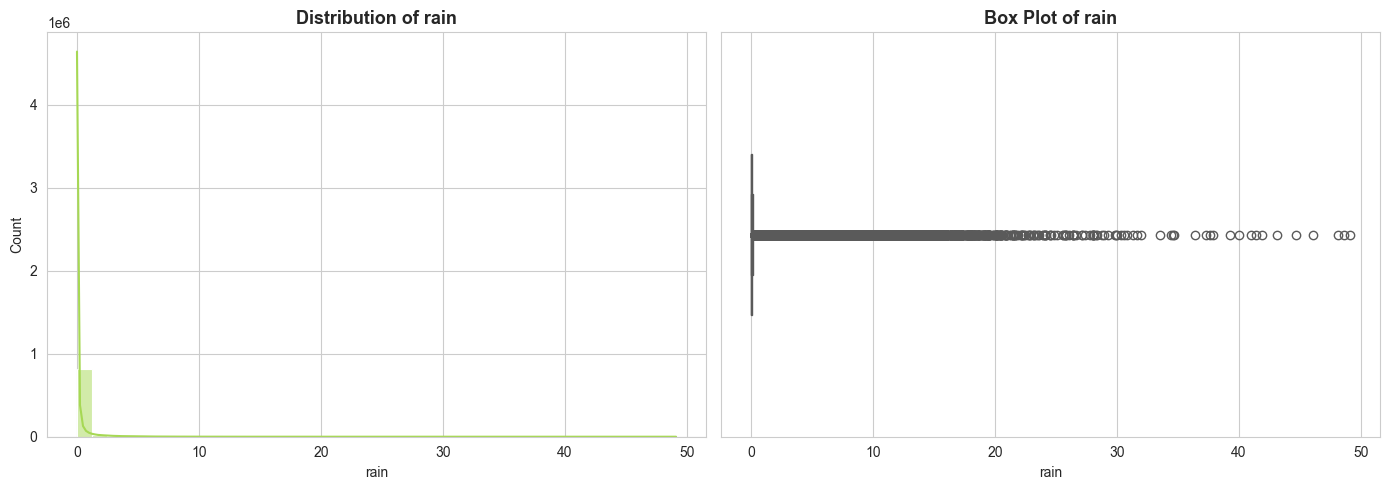

In [24]:
plot_numerical_distribution_and_boxplot(numeric_cols[4], 4)

**In summary:**
- The distribution of `rain` is **highly right-skewed**, with the vast majority of observations clustered near **0 mm**, indicating that most time periods experience little to no rainfall.
- The box plot reveals a large number of **high-value outliers** extending up to approximately **50 mm**, representing **occasional heavy rainfall events**.
- Although these extreme rainfall values occur infrequently, they dominate the overall variability and suggest that precipitation patterns are driven primarily by rare but intense rain episodes.

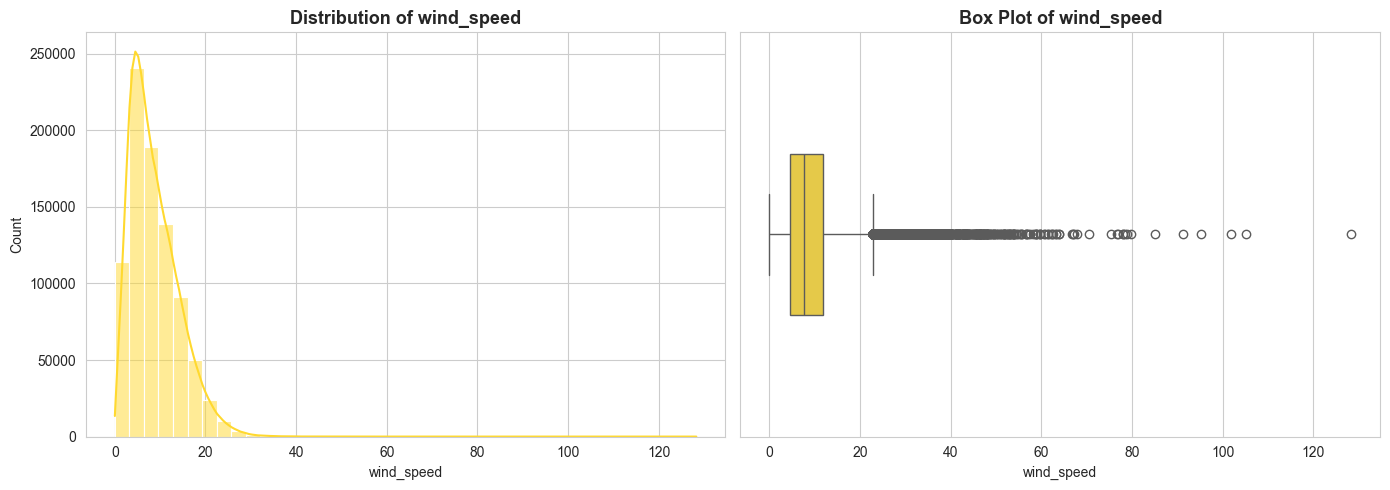

In [25]:
plot_numerical_distribution_and_boxplot(numeric_cols[5], 5)

**In summary:**
- The distribution of `wind_speed` is **strongly right-skewed**, with most values concentrated at **low wind speeds (approximately 0–15 m/s)**, indicating generally calm to moderate wind conditions.
- The box plot reveals numerous **high-value outliers** extending beyond **30 m/s**, representing rare but **extreme wind events**.
- Although these extreme wind speeds occur infrequently, they contribute substantially to overall variability and may have significant impacts on weather dynamics and pollutant dispersion.

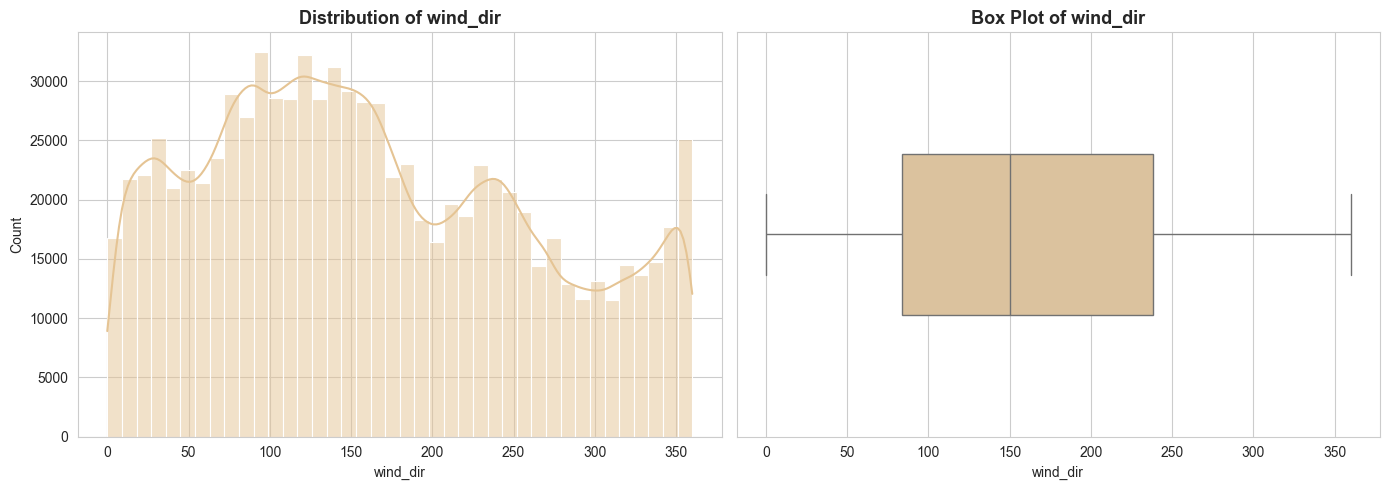

In [26]:
plot_numerical_distribution_and_boxplot(numeric_cols[6], 6)

**In summary:**
- The distribution of `wind_dir` is **widely spread across the full 0–360° range**, indicating that wind directions are highly variable and occur from nearly all possible directions.
- The histogram shows multiple local peaks rather than a single dominant direction, suggesting the absence of a strongly prevailing wind direction.
- The box plot reflects a broad interquartile range with no extreme outliers, indicating that wind direction values are evenly dispersed rather than driven by rare anomalies.

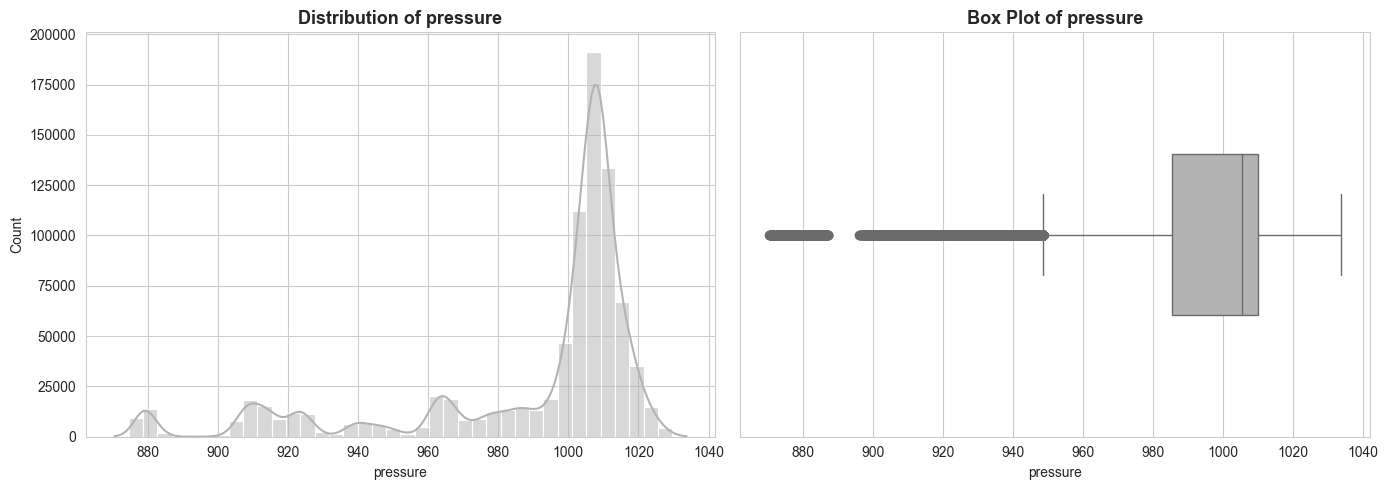

In [27]:
plot_numerical_distribution_and_boxplot(numeric_cols[7], 7)

**In Summary:**
- The distribution of `pressure` is **unimodal** with a **sharp central peak**, indicating that most observations are tightly clustered around a typical pressure value.
- It exhibits a **slight left-skewed shape**, as the lower-pressure tail extends further than the higher-pressure side.
- Overall, the distribution is **approximately normal**, with mild asymmetry driven by occasional low-pressure events.

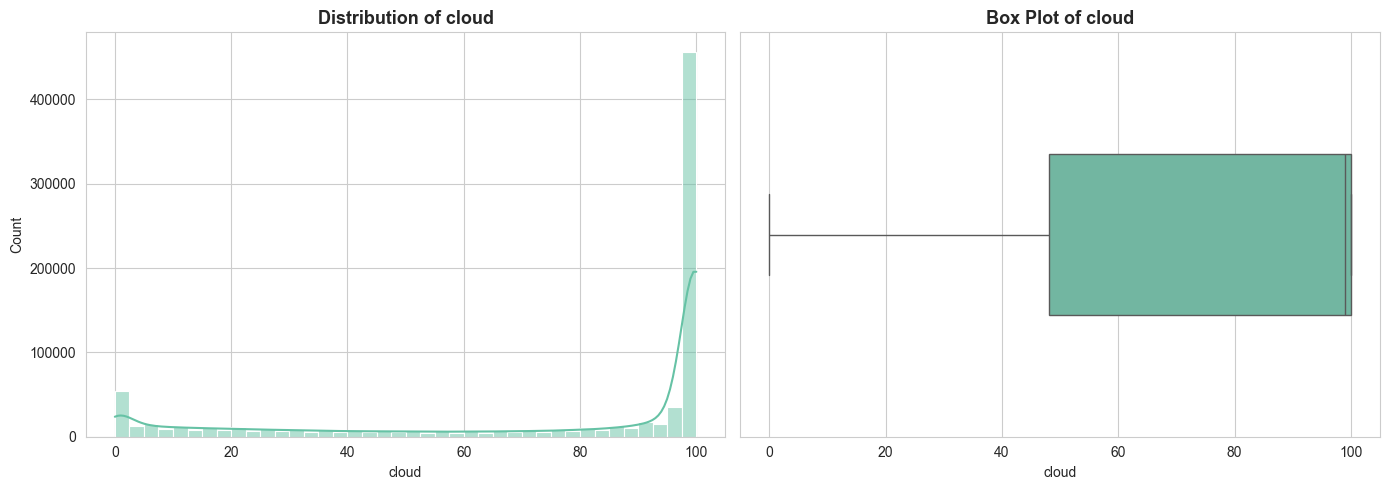

In [28]:
plot_numerical_distribution_and_boxplot(numeric_cols[8], 8)

**In Summary:**
- The distribution of `cloud` is **strongly left-skewed**, with a large concentration of values near **100% cloud cover**, indicating predominantly cloudy conditions.
- The histogram shows a sharp peak at the upper bound, suggesting that **fully overcast conditions** occur very frequently.
- The box plot reflects a wide interquartile range extending toward high values, with relatively few low-cloud observations contributing to the long left tail.

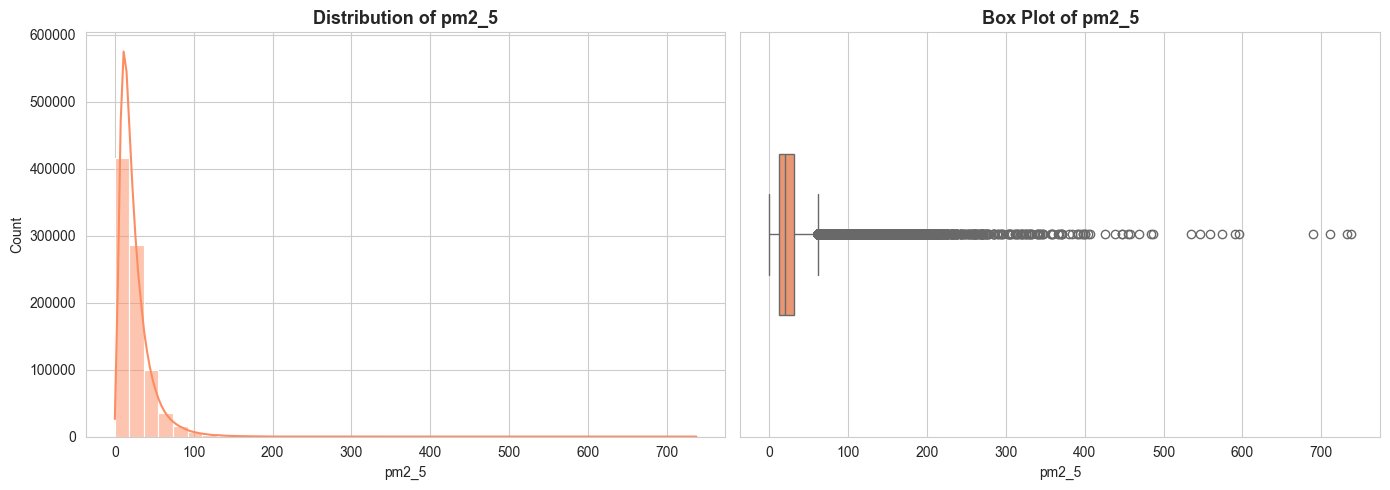

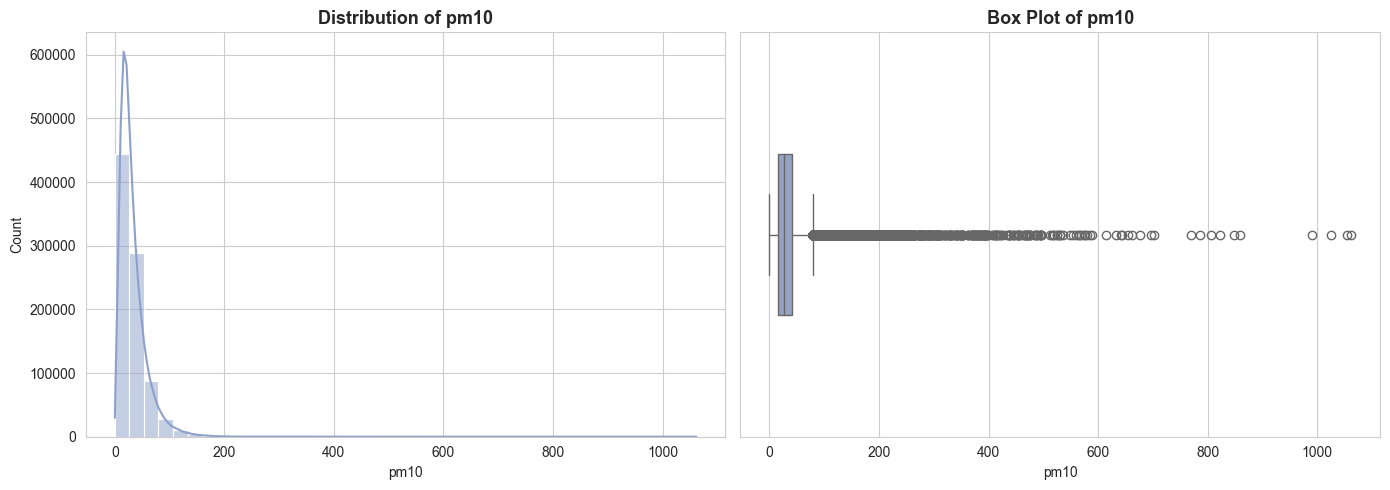

In [29]:
plot_numerical_distribution_and_boxplot(numeric_cols[9], 9)
plot_numerical_distribution_and_boxplot(numeric_cols[10], 10)

**In Summary:**
- Both `pm2_5` and `pm10` exhibit **strongly right-skewed distributions**, with the majority of observations concentrated at **low concentration levels**, while a long right tail reflects extreme pollution events.
- The histograms show sharp peaks near the lower end, indicating that **normal air quality conditions are common**, whereas the box plots reveal a large number of **high-value outliers**, representing severe but infrequent pollution episodes.
- These extreme values substantially increase overall variability, suggesting that particulate matter pollution is driven more by **sporadic spikes** rather than consistently high baseline levels.

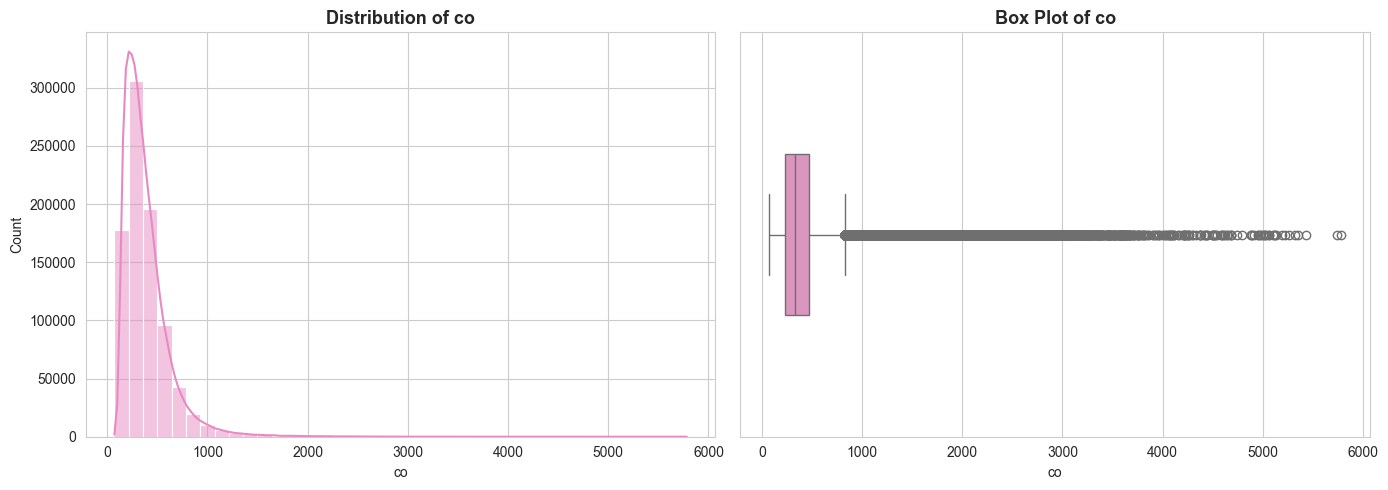

In [30]:
plot_numerical_distribution_and_boxplot(numeric_cols[11], 11)

**In Summary:**
- The distribution of `co` is **strongly right-skewed**, with most observations concentrated at **low CO concentrations**, indicating that normal conditions are generally within safe or moderate levels.
- The histogram shows a sharp peak near the lower end, while the long right tail reflects **extreme CO concentration spikes**.
- The box plot reveals a large number of **high-value outliers**, suggesting that although high CO levels are infrequent, they significantly contribute to overall variability and represent potentially hazardous pollution events.

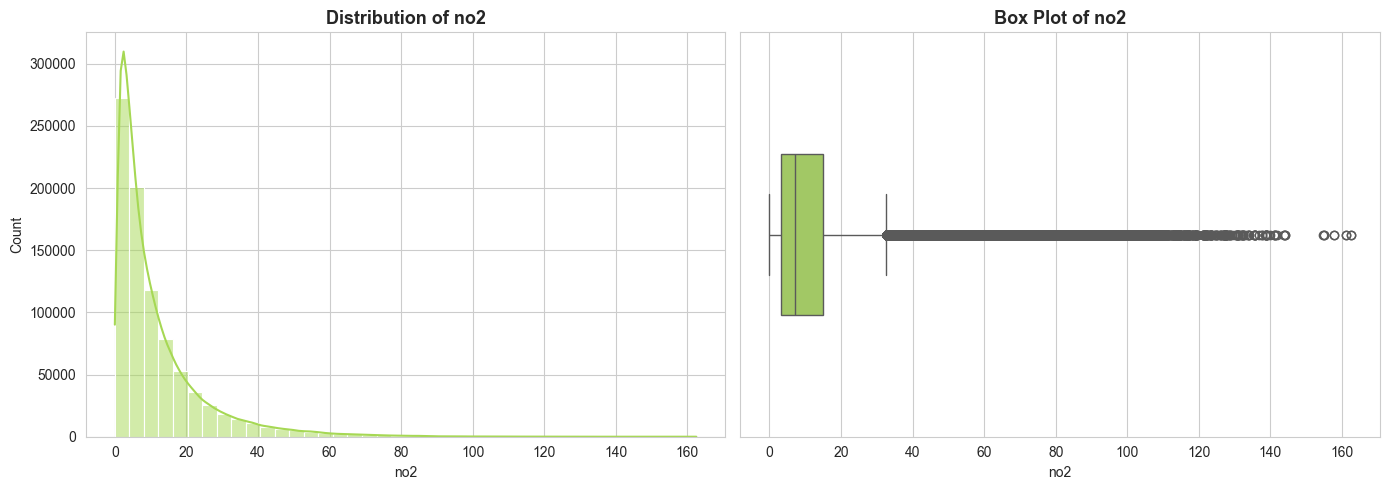

In [31]:
plot_numerical_distribution_and_boxplot(numeric_cols[12], 12)

**In Summary:**
- The distribution of `no2` is **strongly right-skewed**, with most observations concentrated at **low NO₂ concentrations**, indicating that typical conditions are generally within lower pollution levels.
- The histogram displays a sharp peak near the lower end, while the long right tail reflects **occasional high NO₂ episodes**.
- The box plot reveals numerous **high-value outliers**, suggesting that although elevated NO₂ levels are infrequent, they substantially increase overall variability and may correspond to traffic-related or combustion-driven pollution events.

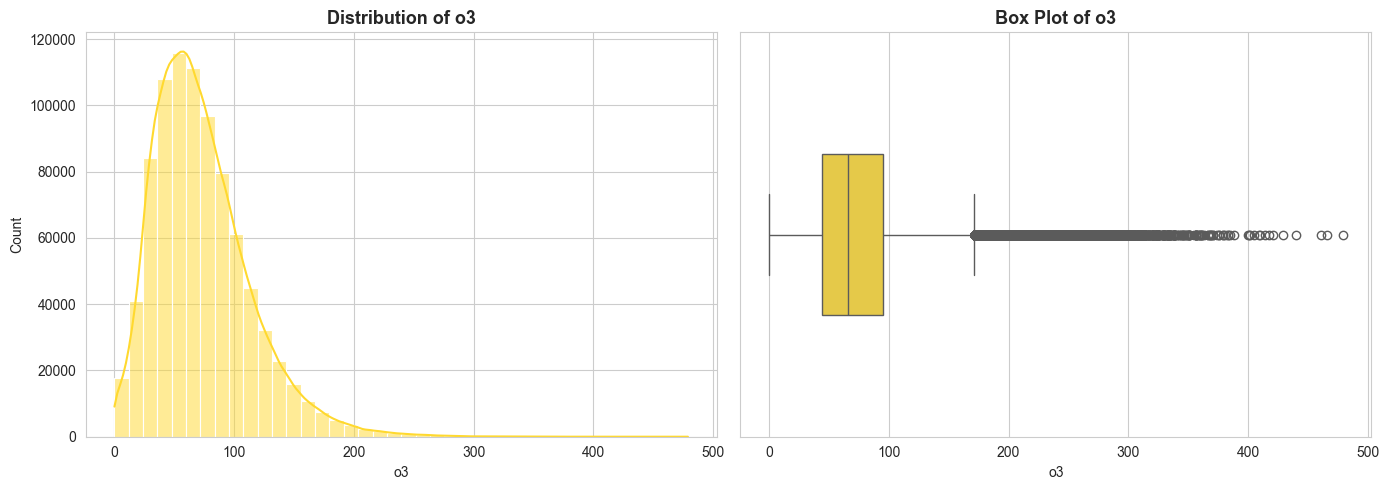

In [32]:
plot_numerical_distribution_and_boxplot(numeric_cols[13], 13)

**In Summary:**
- The distribution of `o3` is **right-skewed**, with most observations concentrated at **moderate ozone concentrations**, while a long right tail reflects higher ozone levels.
- The histogram shows a main peak in the lower-to-mid range, indicating that typical ozone conditions are relatively moderate.
- The box plot reveals several **high-value outliers** (above approximately **200**), suggesting occasional **elevated ozone episodes**, which may be associated with photochemical reactions under strong sunlight.


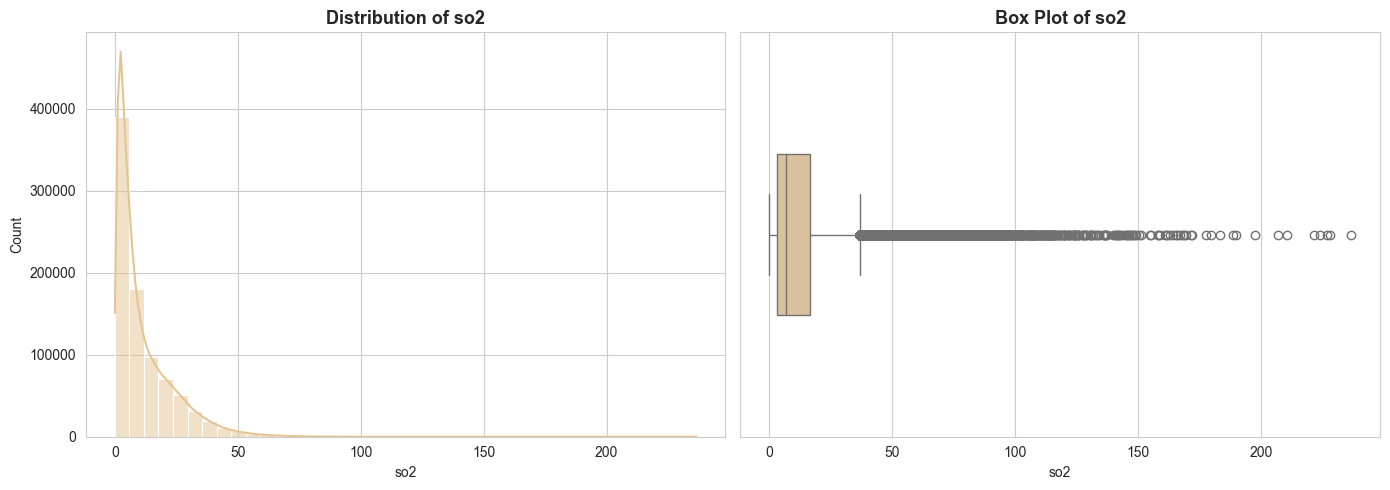

In [33]:
plot_numerical_distribution_and_boxplot(numeric_cols[14], 14)

**In Summary:**
- The distribution of `so2` is **strongly right-skewed**, with most observations concentrated at **very low SO₂ concentrations**, indicating generally low baseline levels.
- The histogram shows a sharp peak near zero, while the long right tail reflects **occasional SO₂ concentration spikes**.
- The box plot reveals numerous **high-value outliers**, suggesting that although elevated SO₂ levels are relatively rare, they significantly contribute to overall variability and may be associated with **industrial emissions or combustion-related events**.

### 2. Categorical Columns Analysis

#### 2.1. Categorical Columns in Dataset

In [34]:
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
print(f"There are {len(categorical_cols)} categorical columns.")
print(categorical_cols)

There are 2 categorical columns.
['city', 'pollution_level']


#### 2.2. Value Distribution

##### The `city` column

In [35]:
unique_citys = df['city'].nunique()
print(f'Amount of city in dataset is: {unique_citys}')

Amount of city in dataset is: 34


**Note:** Due to the purpose of data collection based on 34 provinces and cities, the frequency of occurrence for each province and city should be the same

##### The `pollution_level` column

In [36]:
def plot_categorical_distribution(col_count, col_name, top_n=5):
    top_vals = col_count.nlargest(top_n).index
    top_counts = col_count.nlargest(top_n).values

    plt.figure(figsize=(12, 5))
    sns.barplot(x=top_counts, y=top_vals, hue=top_vals, palette="viridis", legend=False)
    plt.title(f'Most Frequent {col_name}', fontsize=15)
    plt.xlabel('Number of Appearances', fontsize=12)
    plt.ylabel(col_name, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

There are 6 unique values in pollution_level column.
Most frequent pollution_level values is: Moderate with 469640 appearances.


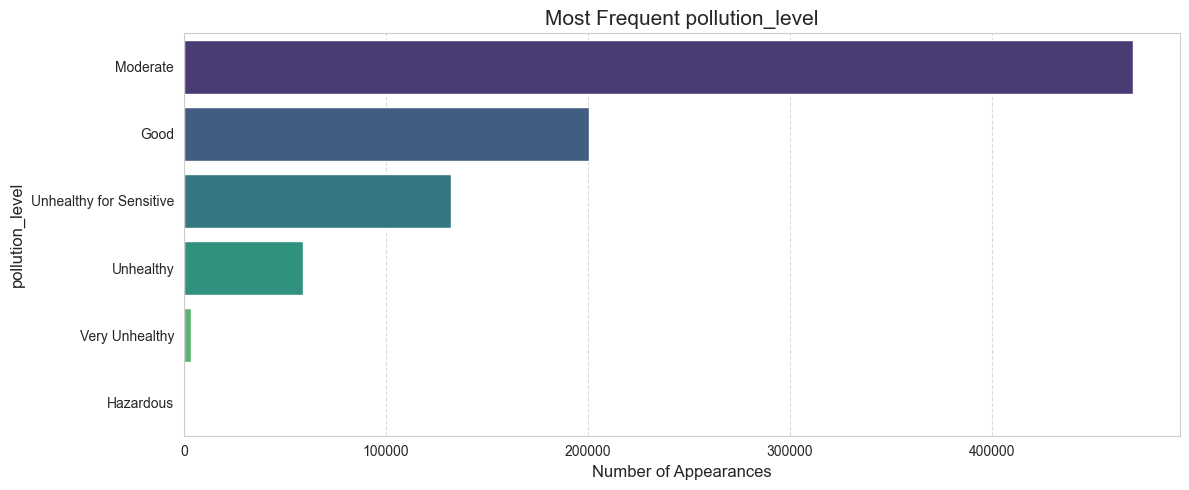

In [37]:
unique_pollution_level = df_processed['pollution_level'].nunique()
pollution_level_counts = df_processed['pollution_level'].value_counts()
print(f'There are {unique_pollution_level} unique values in pollution_level column.')
print(f'Most frequent pollution_level values is: {pollution_level_counts.idxmax()} with {pollution_level_counts.max()} appearances.')
plot_categorical_distribution(pollution_level_counts, 'pollution_level', top_n = 6)

**The air-quality levels are categorized into six pollution tiers based on the AQI**
|**AQI Level**|**AQI Range**|
|-----------|-------------|
|**Good**  |0-50|
|**Moderate**|51-100|
|**Unhealthy for Sensitive** |101-150|
|**Unhealthy**|151-200|
|**Very Unhealthy**  |201-300|
|**Hazardous**|301-500|

**In Summary:**
- The dataset contains **6 distinct pollution levels**, with **`Moderate`** being the most frequent category, accounting for **469,640 observations**, indicating that air quality is most often at a moderate level.
- The combined dominance of **`Moderate`** and **`Good`** categories suggests that **acceptable air quality conditions prevail most of the time**, while severe pollution episodes occur less frequently.
- Higher-risk categories such as **`Very Unhealthy`** and **`Hazardous`** appear **very rarely**, implying that extreme air pollution events are uncommon but potentially critical when they occur.
- This distribution indicates a **class imbalance**, which should be carefully considered in downstream tasks such as classification or risk prediction models.



## IV. Relationships & Correlations

#### 1. Correlation Heatmap 1: Pollutants vs. AQI
- **Variables:** `aqi`, `pm2_5`, `pm10`, `co`, `no2`, `so2`, `o3`
- **Goal:** Verify which pollutant drives the AQI most.


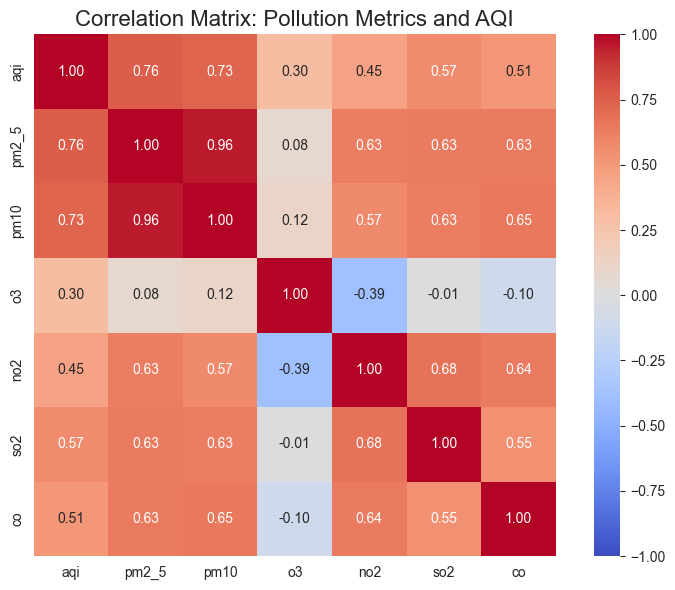

In [38]:
cols_pollution_aqi = ["aqi", "pm2_5", "pm10", "o3", "no2", "so2", "co"]
corr_mat_pollution_aqi = df_processed[cols_pollution_aqi].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat_pollution_aqi, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix: Pollution Metrics and AQI", fontsize=16)
plt.tight_layout()
plt.show()

**Key Insights on AQI Correlations**
- **PM2.5 (0.76) and PM10 (0.73)** show the strongest correlations with AQI $\to$ fine and coarse particulate matter are the primary drivers of air-quality degradation.
- **SO₂ (0.57), CO (0.51), and NO₂ (0.45)** have moderate correlations with AQI $\to$ these gases act as secondary contributors to pollution levels.
- **O₃ (0.30)** has only a weak relationship with AQI $\to$ ozone does not vary strongly in sync with AQI in this dataset.

**Overall:** AQI is mainly driven by PM2.5 and PM10, while SO₂, CO, and NO₂ play supporting roles. Ozone shows minimal influence on AQI in this data.

#### 2. Correlation Heatmap 2: Weather vs. AQI
- **Variables:** `aqi`, `temp`, `humidity`, `rain`, `wind_speed`, `wind_dir`, `pressure`, `cloud`
- **Goal:** Identify which meteorological factors most influence the AQI.

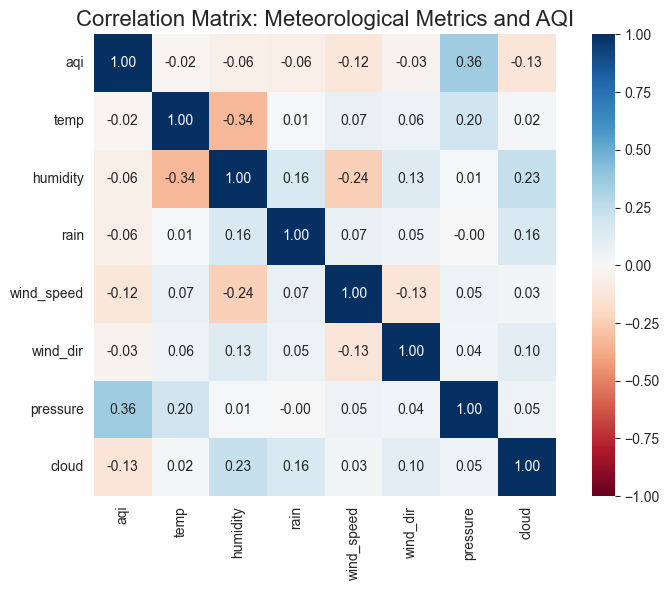

In [39]:
cols_meteorological_aqi = ["aqi", "temp", "humidity", "rain", "wind_speed", "wind_dir", "pressure", "cloud"]
corr_mat_meteorological_aqi = df_processed[cols_meteorological_aqi].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat_meteorological_aqi, annot=True, fmt=".2f", cmap="RdBu", vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix: Meteorological Metrics and AQI", fontsize=16)
plt.tight_layout()
plt.show()

**Key Insights on Weather–AQI Correlations**
- **Pressure (0.36)** shows the strongest correlation with AQI $\to$ high-pressure conditions tend to trap pollutants and worsen air quality.
- **Wind Speed (–0.12)** has a weak negative correlation $\to$ stronger wind slightly helps disperse pollutants.
- **Rainfall (–0.06)** also shows a weak negative relationship $\to$ rain has a mild cleaning effect on the air.
- **Temperature (–0.02)** and **humidity (–0.06)** exhibit near-zero correlations $\to$ limited direct impact on AQI in this dataset.
- **Cloud Cover (–0.13)** has a weak negative correlation $\to$ cloudy conditions may modestly support pollutant dispersion.

**Overall:** Weather variables show generally weak relationships with AQI, except pressure, which stands out as the most influential meteorological factor.

**Note:** Do not discard weather features (like Temperature or Wind Speed) simply because their Pearson correlation coefficient with AQI is low (e.g., 0.1 or -0.15).
- **Non-Linearity:** Pearson correlation only measures linear relationships. Environmental interactions are often complex and non-linear (e.g., Temperature affects AQI in a U-shape pattern: both extreme cold and extreme heat can raise AQI).
- **Model Capability:** Tree-based models (Random Forest, XGBoost) excel at capturing these non-linear patterns and complex interactions (e.g., the combination of Low Wind + High Humidity) that a simple correlation matrix cannot show.
- **Action:** Keep these features for training and rely on Feature Importance scores from the model later to decide on removal.

## V. Meaningful Questions

**Extract Time Components**

In [40]:
df_ques = df_processed.copy()

df_ques["timestamp"] = pd.to_datetime(df_ques["timestamp"])

df_ques["hour"] = df_ques["timestamp"].dt.hour
df_ques["day"] = df_ques["timestamp"].dt.day
df_ques["month"] = df_ques["timestamp"].dt.month
df_ques["year"] = df_ques["timestamp"].dt.year
df_ques["day_of_week"] = df_ques["timestamp"].dt.dayofweek
df_ques["day_name"] = df_ques["timestamp"].dt.day_name()
ids_random = np.random.choice(df_ques.index, size=5, replace=False)
df_ques.loc[ids_random, ["timestamp", "hour", "day", "month", "year", "day_of_week", "day_name"]]

,timestamp,hour,day,month,year,day_of_week,day_name
575786,2024-12-06 14:00:00,14,6,12,2024,4,Friday
17280,2023-01-22 04:00:00,4,22,1,2023,6,Sunday
97165,2023-04-30 01:00:00,1,30,4,2023,6,Sunday
537386,2024-10-20 13:00:00,13,20,10,2024,6,Sunday
14574,2023-01-18 20:00:00,20,18,1,2023,2,Wednesday


### 1. Investigating the Impact of Human Activities
To distinguish between anthropogenic and natural factors.
- **Q1:** Does air quality significantly improve on weekends compared to weekdays?
- **Q2:** Do daily pollution peaks align with urban rush hours (07:00-09:00 & 17:00-19:00)?

#### Q1: Does air quality significantly improve on weekends compared to weekdays?

In [42]:
# Create Day of Week features
df_ques["is_weekend"] = df_ques["day_of_week"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

**AQI Trend by Day**

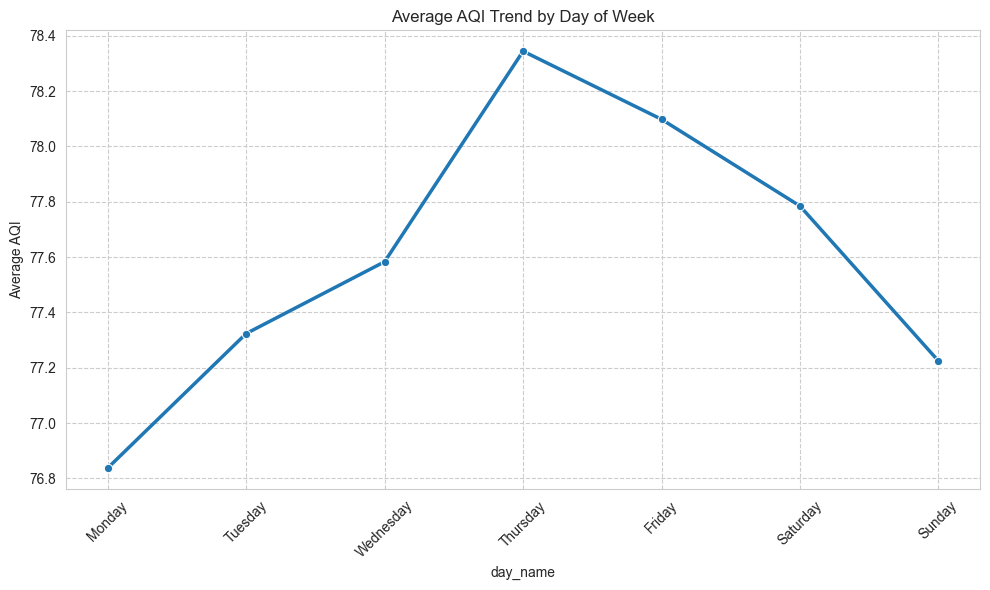

In [43]:
df_ques["day_name"] = pd.Categorical(df_ques["day_name"], categories=days_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ques, x="day_name", y="aqi", 
             estimator="mean", errorbar=None, 
             marker="o", linewidth=2.5)

plt.xticks(rotation=45) 
plt.title("Average AQI Trend by Day of Week")
plt.ylabel("Average AQI")
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

In [46]:
# Split data into two groups
group_weekday = df_ques[df_ques["is_weekend"] == 'Weekday']['aqi']
group_weekend = df_ques[df_ques["is_weekend"] == 'Weekend']['aqi']

# Calculate means
mean_weekday = group_weekday.mean()
mean_weekend = group_weekend.mean()
diff_pct = ((mean_weekday - mean_weekend) / mean_weekday) * 100

print(f"1. Mean AQI (Weekday): {mean_weekday:.2f}")
print(f"2. Mean AQI (Weekend): {mean_weekend:.2f}")
print(f"3. Decrease on Weekends: {diff_pct:.2f}%")

# Perform T-test (Independent samples)
# alternative='greater': Testing if Weekday AQI > Weekend AQI
t_stat, p_value = stats.ttest_ind(group_weekday, group_weekend, alternative='greater')

print(f"4. P-value: {p_value:.10f}")

alpha = 0.05 # Significance level
if p_value < alpha:
    print("\nCONCLUSION: Reject Null Hypothesis (H0). Accept Alternative Hypothesis (H1).")
    print("There is a statistically significant improvement in air quality on weekends.")
    print("-> This suggests that traffic/industrial activities contribute significantly to pollution.")
else:
    print("\nCONCLUSION: Fail to reject Null Hypothesis (H0).")
    print("No significant difference found between weekdays and weekends.")

1. Mean AQI (Weekday): 77.64
2. Mean AQI (Weekend): 77.50
3. Decrease on Weekends: 0.17%
4. P-value: 0.0689893080

CONCLUSION: Fail to reject Null Hypothesis (H0).
No significant difference found between weekdays and weekends.


**Evaluate**
- **Trend Analysis**
  - **Mid-week Peak Pattern:** The data exhibits an upward trend starting from a low point on **Monday (76.8)**, gradually increasing to a peak on **Thursday (78.3)** or Friday, followed by a slight decline over the weekend.
  - **Monday as the Cleanest Day:** This is a notable observation. It may be attributed to a "lag effect" from Sunday's reduced traffic extending into Monday morning, or simply that commuter activity at the start of the week takes time to reach peak intensity.
  - **Thursday/Friday as Pollution Peaks:** These days likely represent the **accumulation of emissions** following several consecutive workdays.
- **Magnitude Assessment**
  - **Negligible Variation:** The variance between the highest and lowest daily averages is minimal, at approximately 1.5 AQI units ($78.3 - 76.8$).
  - **Practical Implication:** This margin is too slight to be perceptible to human senses. Regardless of whether it is a Monday or a Sunday, pollution levels remain effectively constant (consistently within the 'Moderate' range).
- **Key Insight:** Absence of a Distinct **'Weekend'** Effect in Vietnam.
  
    The initial hypothesis that "reduced weekend traffic leads to cleaner air" does not hold true in this context. This suggests two underlying drivers:
  - **Lifestyle & Mobility Patterns:** In major Vietnamese urban centers (specifically Hanoi and Ho Chi Minh City), weekends are characterized by bustling recreational activities. Work-related commuting is likely replaced by leisure traffic, keeping total emission levels relatively high.
  - **Dominant Meteorological Factors:** It is highly probable that weather conditions (Wind, Precipitation, Seasonality) exert a **far stronger influence** on AQI than the minor weekly fluctuations in vehicular traffic.

#### Q2: Do daily pollution peaks align with urban rush hours (07:00-09:00 & 17:00-19:00)?

In [47]:
major_cities = ["Hà Nội", "Hồ Chí Minh", "Đà Nẵng", "Cần Thơ", "Hải Phòng", "Huế", "Bình Dương", "Vũng Tàu", "Nha Trang"]
df_major = df_ques[df_ques["city"].isin(major_cities)]

**Average Hourly AQI Trend**

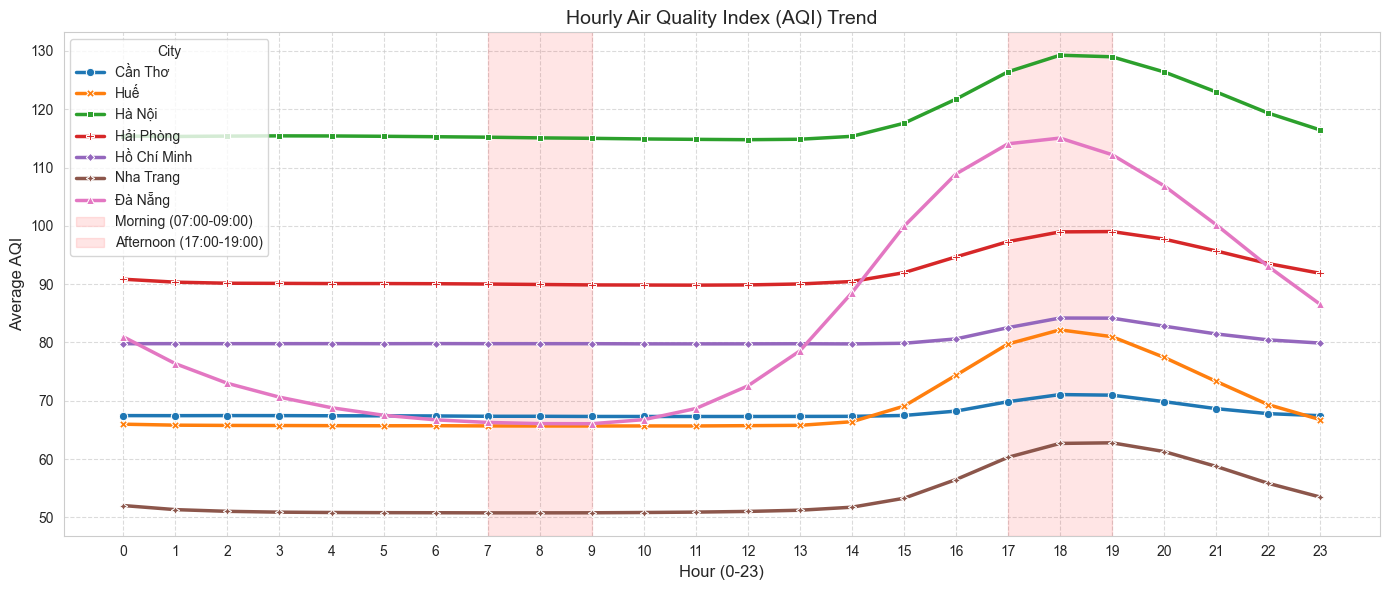

In [48]:
plt.figure(figsize=(14, 6))

sns.lineplot(data=df_major, x="hour", y="aqi", hue="city", 
             style="city", errorbar=None, markers=True, dashes=False, linewidth=2.5)

plt.axvspan(7, 9, color="red", alpha=0.1, label="Morning (07:00-09:00)")
plt.axvspan(17, 19, color="red", alpha=0.1, label="Afternoon (17:00-19:00)")

plt.title("Hourly Air Quality Index (AQI) Trend", fontsize=14)
plt.xlabel("Hour (0-23)", fontsize=12)
plt.ylabel("Average AQI", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="City")
plt.tight_layout()
plt.show()

**Investigating Culprits (Traffic Emissions: NO2 & CO)**

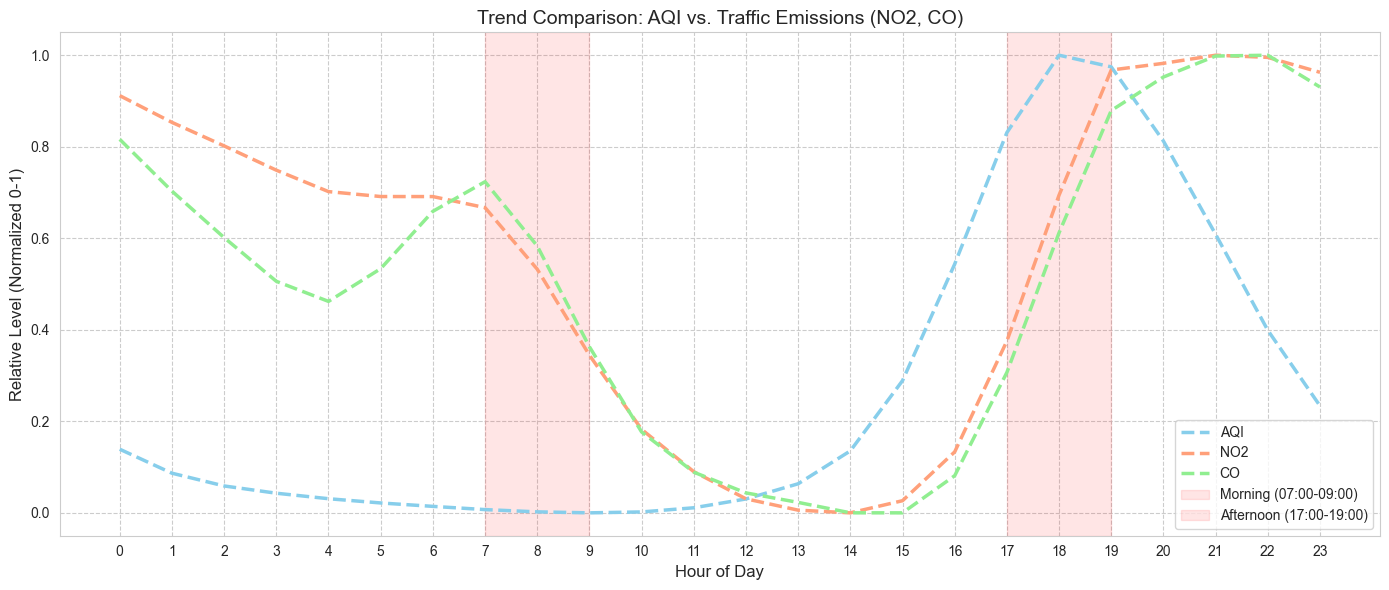

In [51]:
hourly_trend = df_ques.groupby("hour")[["aqi", "no2", "co"]].mean()

# Min-Max Scaling to 0-1 for trend comparison
scaler = MinMaxScaler()
hourly_scaled = pd.DataFrame(scaler.fit_transform(hourly_trend), columns=hourly_trend.columns, index=hourly_trend.index)
hourly_scaled.head()

plt.figure(figsize=(14, 6))

plt.plot(hourly_scaled.index, hourly_scaled["aqi"], label="AQI", linewidth=2.5, color="skyblue", linestyle="--")
plt.plot(hourly_scaled.index, hourly_scaled["no2"], label="NO2", linewidth=2.5, color="lightsalmon", linestyle="--")
plt.plot(hourly_scaled.index, hourly_scaled["co"], label="CO", linewidth=2.5, color="lightgreen", linestyle="--")   

plt.axvspan(7, 9, color="red", alpha=0.1, label="Morning (07:00-09:00)")
plt.axvspan(17, 19, color="red", alpha=0.1, label="Afternoon (17:00-19:00)")

plt.title("Trend Comparison: AQI vs. Traffic Emissions (NO2, CO)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Relative Level (Normalized 0-1)", fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, linestyle="--")
plt.tight_layout()
plt.show()

**Evaluate**
- **Spatial Trends**
  
  The data reveals two contrasting pollution patterns across different regions:
  - **Northern & Central Regions (Hanoi, Da Nang):** Exhibit **extreme fluctuations** (U-shaped trend). Pollution levels are high during the night and early morning, dip at midday, and reach their absolute peak around **18:000**.
  - **Southern Region (Ho Chi Minh City, Can Tho):** Shows **stability**, with a flat trend line. HCMC maintains a moderate background pollution level throughout the 24-hour cycle, avoiding extreme peaks due to favorable ventilation conditions.
- **Key Correlations (Dust, Emissions & Weather)**
  - **The Morning Paradox:** Despite being rush hour **(07:00 - 09:00)**, AQI and traffic emissions ($NO_2, CO$) drop to their daily lows. 
    - Cause: Solar radiation generates thermal convection, dispersing pollutants faster than the rate of vehicle emissions.
  - **The Evening Trap:** The **18:00 - 21:00** timeframe represents the most critical pollution period.
    - Cause: A "double impact" effect—surging commuter traffic combined with thermal inversion traps pollutants at the ground level, preventing dispersion.
- **Conclusion & Implications**
  - **Root Cause:** The synchronized fluctuation between AQI and Engine Emissions ($NO_2, CO$) in the evening confirms that **Traffic** is the primary source. However, **Meteorology** is the decisive factor governing the intensity of pollution concentration.
  - **Actionable Insight:** Health protection measures and emission control policies should be specifically targeted at the **18:00 - 21:00** window, rather than being applied uniformly throughout the day.

### 3.2. Analyzing Regional Disparities & Urban Scale
To understand how geography and city size dictate pollution levels.
- **Q3:** Do Northern (Subtropical) and Southern (Tropical) regions exhibit contrasting seasonal patterns?
- **Q4:** Is air quality in Megacities (Tier-1 like Hanoi, HCMC) significantly worse than in provincial cities (Tier-2)?